In [1]:
import matplotlib.pyplot as plt
import os

from train_model import collect_data
from train_model import SETTINGS

from simpledl.config import Config
from simpledl.dataset import prepare_dataset

Using TensorFlow backend.


Define where the training data lies:

In [2]:
basedir = ''  # where is the data
input_dir = os.path.join(basedir, 'raw')
target_dir = os.path.join(basedir, 'segm')

In [3]:
config = Config(**SETTINGS)

In [4]:
dataset = prepare_dataset(
    collect_data(input_dir, target_dir),
    augmentation_params=config['augmentation'],
    **config['dataset']
)

[18.10.2018 10:16:55] (simpledl.dataset) [INFO]: Training samples: 22
[18.10.2018 10:16:55] (simpledl.dataset) [INFO]: Validation samples: 6


Lets draw some training batches and visualize them

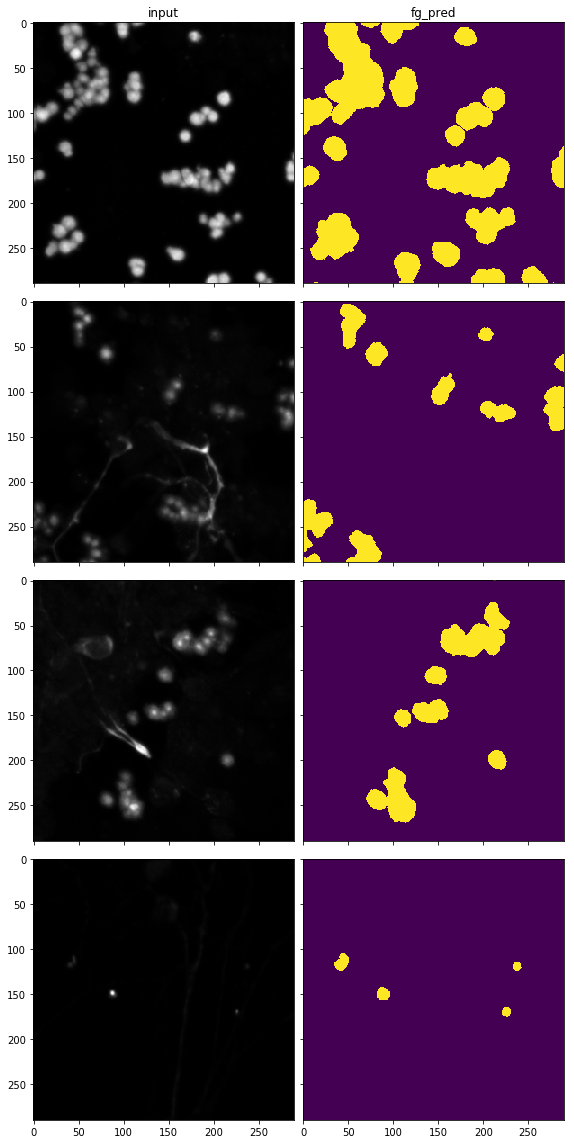

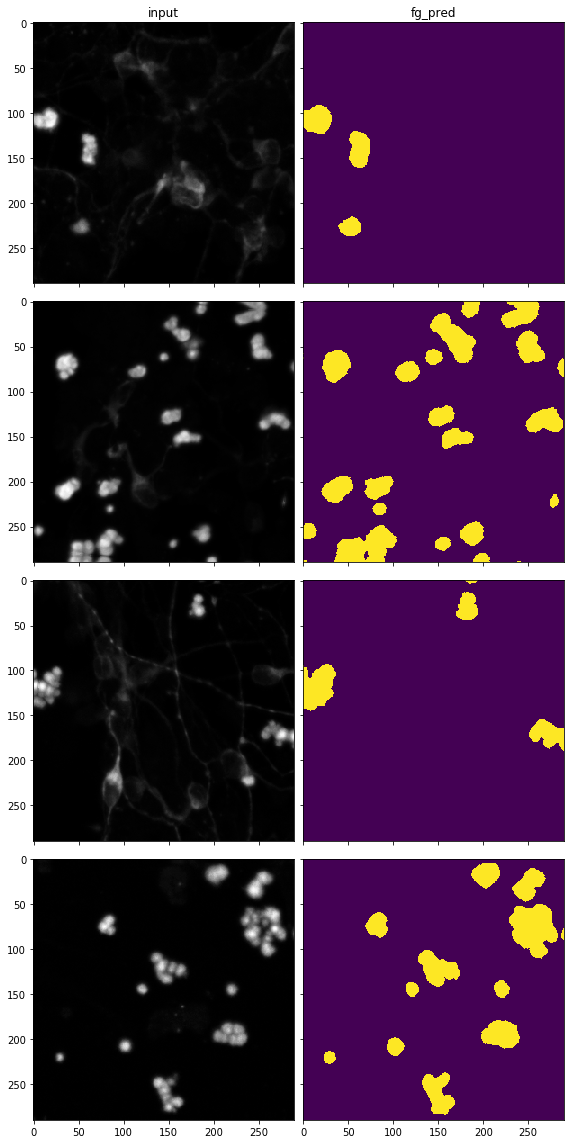

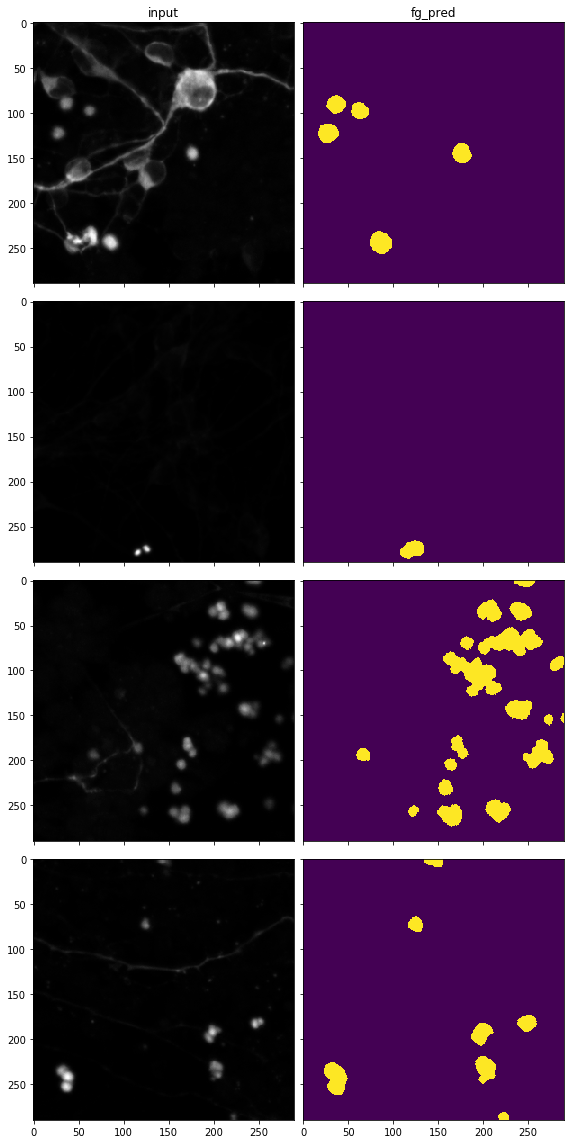

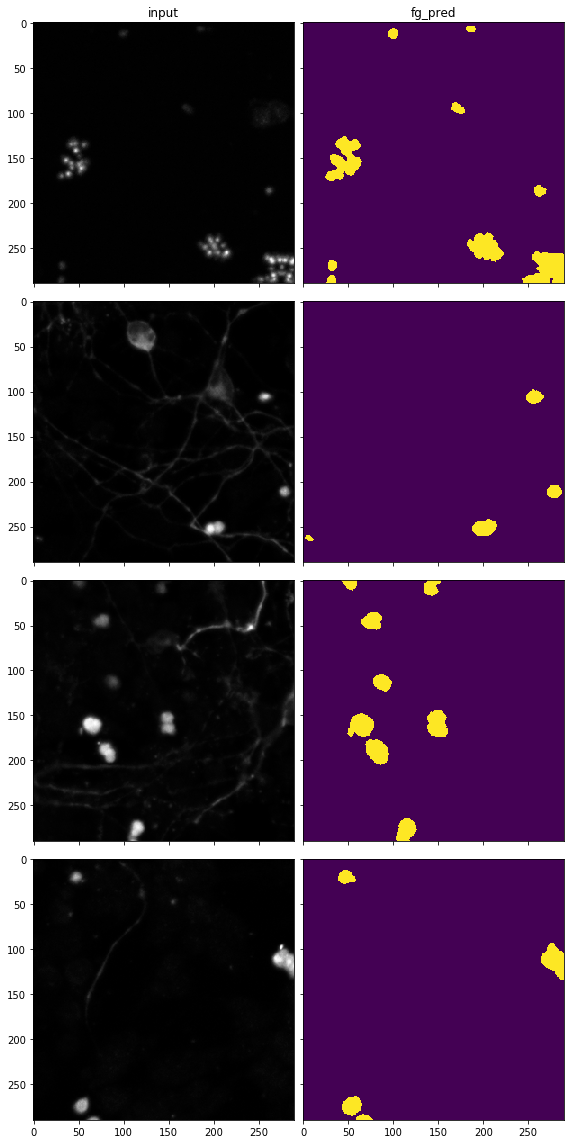

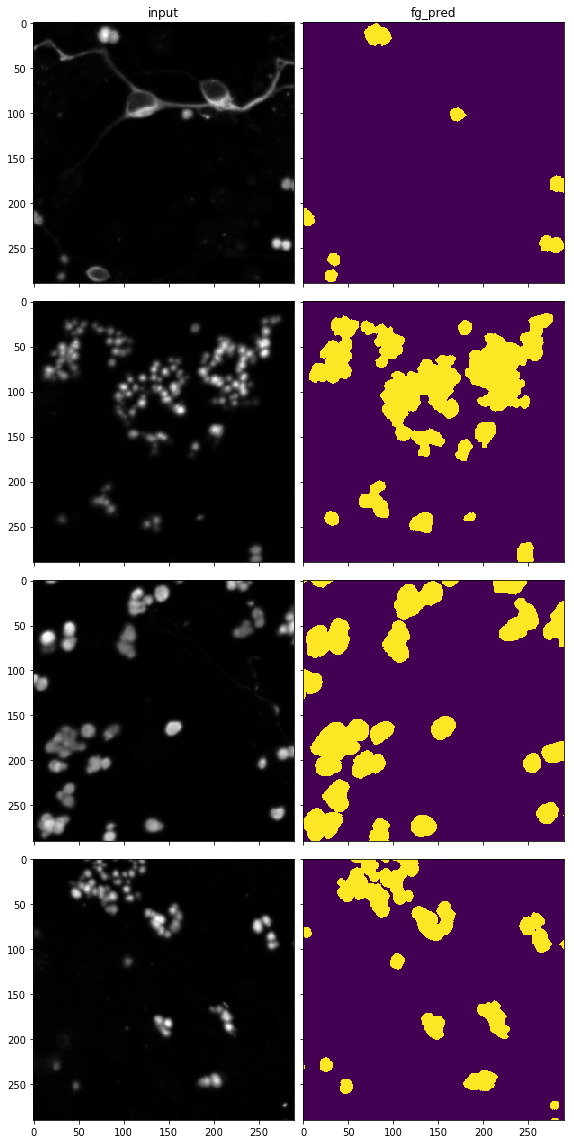

In [6]:
for input_batch, target_batch in dataset['training']:
    
    
    _, axarr = plt.subplots(dataset['training'].batch_size, len(input_batch.keys()) + len(target_batch.keys()),
                           figsize=(8, 4 * dataset['training'].batch_size),
                           sharey=True, sharex=True)
    
    for axcol, key in zip(axarr[0], list(input_batch.keys()) + list(target_batch.keys())):
        axcol.set_title(key)
    
    for key, vals in enumerate(input_batch.values()):
        for idx, val in enumerate(vals):
            axarr[idx, key].imshow(val.squeeze(), cmap='Greys_r')
        
    for key, vals in enumerate(target_batch.values()): 
        for idx, val in enumerate(vals):
            axarr[idx, key + len(input_batch.keys())].imshow(val.squeeze())

    plt.tight_layout()
    plt.show()